Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleure précision : 0.6175894940351637
Accuracy sur les données de test: 0.6170998203661893


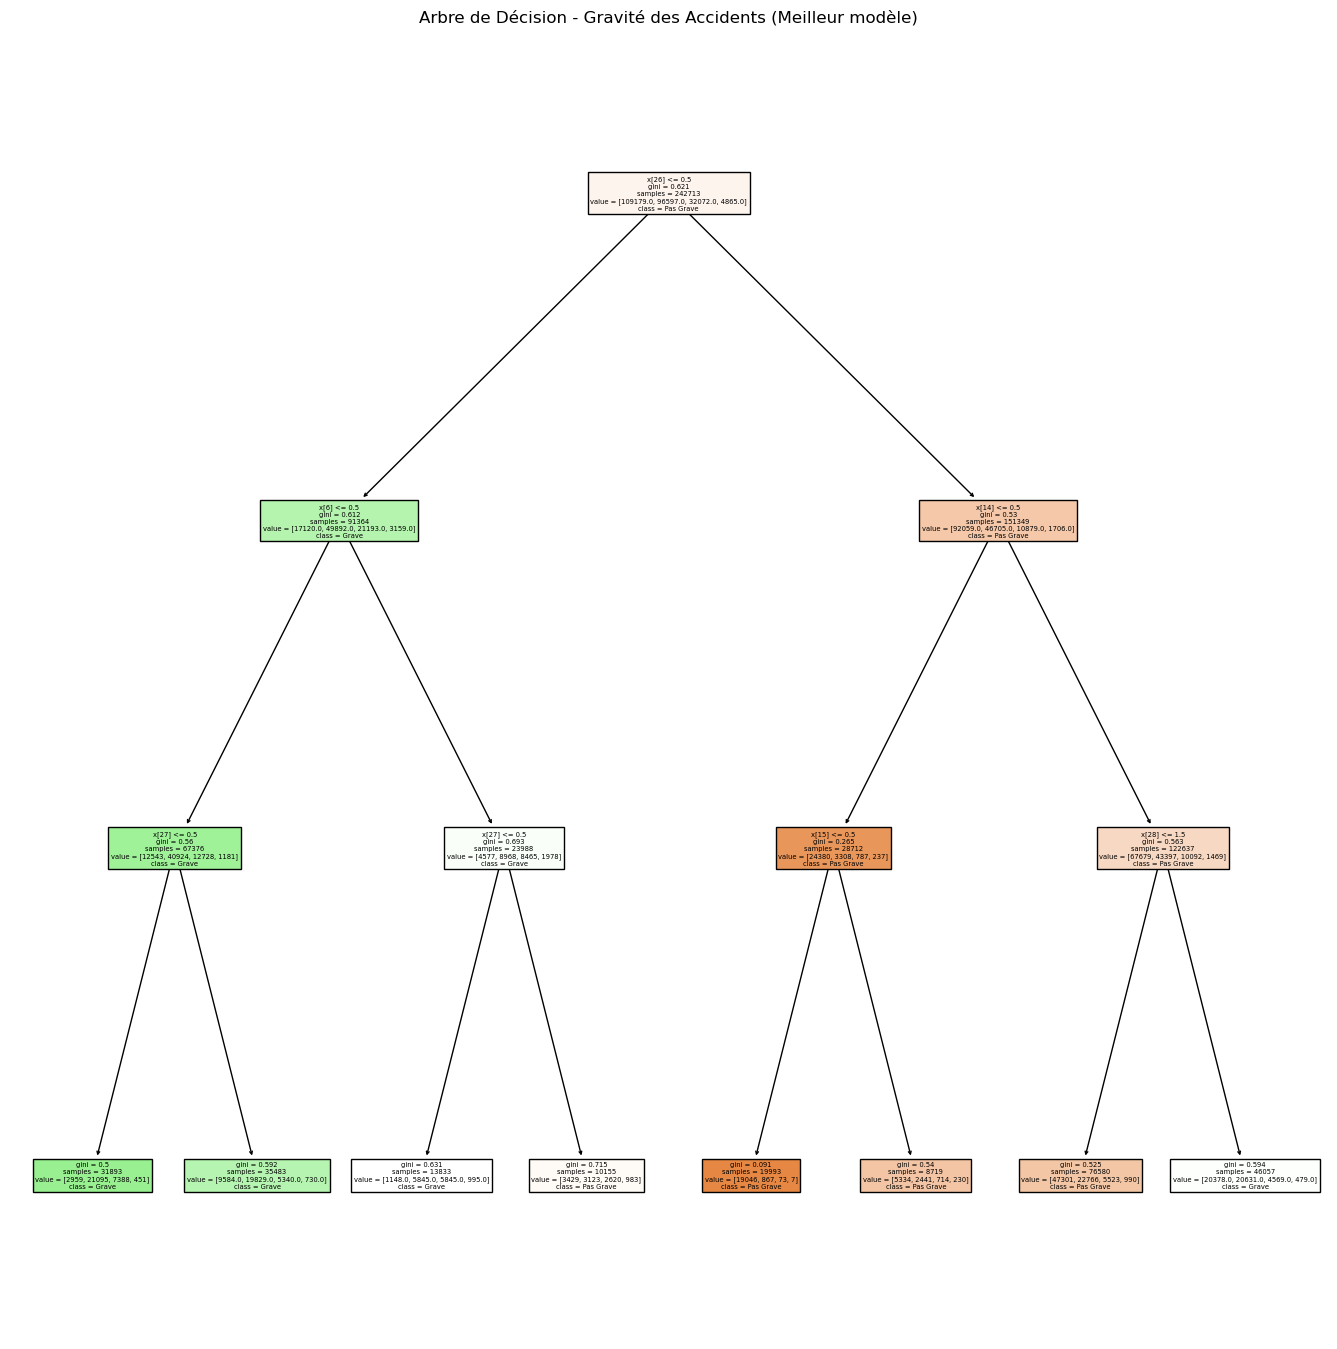

'\nPertinence des Critères Retenus pour Prédire la Gravité d\'un Accident:\n\n1. Profondeur Maximale de l\'Arbre (max_depth):\n   - **Profondeur Maximale de l\'Arbre** : La profondeur de l\'arbre limite le nombre de niveaux que l\'arbre peut avoir. Une profondeur trop grande peut entraîner un surapprentissage (overfitting), tandis qu\'une profondeur trop petite peut entraîner un sous-apprentissage (underfitting). Ainsi, ajuster cette hyperparamètre permet de trouver un bon équilibre pour capturer les informations importantes sans complexité excessive.\n\n2. Nombre Minimal d\'Échantillons pour Diviser un Nœud (min_samples_split):\n   - **min_samples_split** : Ce critère détermine le nombre minimal d\'échantillons requis pour diviser un nœud interne. Une valeur élevée empêche les divisions sur des échantillons trop petits qui pourraient être dus à du bruit, améliorant ainsi la généralisation du modèle.\n\n3. Nombre Minimal d\'Échantillons par Feuille (min_samples_leaf):\n   - **min_sampl

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('C:/Users/jean-/OneDrive/Bureau/Brief13/Brief13_clean/df_ml.csv', delimiter=';')

# Filtrer les données
data = data[data['sexe'] >= 0]

# Séparer les caractéristiques et la cible
X = data.drop('grave', axis=1)
y = data['grave']

# Colonnes à encoder
col_a_encoder = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), col_a_encoder)], remainder='passthrough')
X = ct.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle de base
dt = DecisionTreeClassifier()

# Définir la grille d'hyperparamètres
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Effectuer la recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure précision : {grid_search.best_score_}")

# Utiliser le meilleur modèle pour prédire
best_dtree = grid_search.best_estimator_
predictions = best_dtree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy sur les données de test: {accuracy}")

# Réduire la profondeur de l'arbre pour la visualisation (si nécessaire)
best_dtree.set_params(max_depth=3)
best_dtree.fit(X_train, y_train)

# Visualisation de l'arbre de décision
plt.figure(figsize=(17, 17))
plot_tree(best_dtree, filled=True, feature_names=None, class_names=['Pas Grave', 'Grave'])
plt.title("Arbre de Décision - Gravité des Accidents (Meilleur modèle)")
plt.show()

# Explication des résultats
"""
Explication des Résultats:

1. Meilleurs Paramètres:
   Les meilleurs paramètres trouvés lors de la recherche en grille sont affichés. Ils comprennent la profondeur maximale de l'arbre (max_depth), le nombre minimal d'échantillons requis pour diviser un nœud (min_samples_split), le nombre minimal d'échantillons par feuille (min_samples_leaf) et le critère utilisé pour mesurer la qualité de la division (criterion).

2. Précision de Validation Croisée:
   Le score de précision obtenu lors de la validation croisée avec les meilleurs paramètres est indiqué. Cela donne une idée de la performance attendue du modèle sur des données non vues.

3. Précision sur les Données de Test:
   La précision du modèle sur les données de test est affichée. Cela montre la performance réelle du modèle sur des données distinctes de celles utilisées pour l'entraînement.

4. Visualisation de l'Arbre de Décision:
   Un arbre de décision utilisant les meilleurs paramètres est visualisé. Les nœuds de l'arbre montrent les divisions basées sur les caractéristiques, les distributions des classes et la prédiction faite pour chaque feuille.
"""

# Explication de la Pertinence des Critères:
"""
Pertinence des Critères Retenus pour Prédire la Gravité d'un Accident:

1. Profondeur Maximale de l'Arbre (max_depth):
   - **Profondeur Maximale de l'Arbre** : La profondeur de l'arbre limite le nombre de niveaux que l'arbre peut avoir. Une profondeur trop grande peut entraîner un surapprentissage (overfitting), tandis qu'une profondeur trop petite peut entraîner un sous-apprentissage (underfitting). Ainsi, ajuster cette hyperparamètre permet de trouver un bon équilibre pour capturer les informations importantes sans complexité excessive.

2. Nombre Minimal d'Échantillons pour Diviser un Nœud (min_samples_split):
   - **min_samples_split** : Ce critère détermine le nombre minimal d'échantillons requis pour diviser un nœud interne. Une valeur élevée empêche les divisions sur des échantillons trop petits qui pourraient être dus à du bruit, améliorant ainsi la généralisation du modèle.

3. Nombre Minimal d'Échantillons par Feuille (min_samples_leaf):
   - **min_samples_leaf** : Ce critère détermine le nombre minimal d'échantillons qu'une feuille doit contenir. Il aide à contrôler la taille des feuilles terminales de l'arbre. Des feuilles trop petites peuvent indiquer un modèle surajusté, tandis que des feuilles plus grandes aident à lisser les décisions prises par le modèle.

4. Critère pour Mesurer la Qualité de la Division (criterion):
   - **Critère (criterion)** : Les deux critères couramment utilisés sont le "gini" et l'"entropy". Ils mesurent l'homogénéité des nœuds, avec "gini" favorisant des nœuds plus homogènes et "entropy" calculant la quantité d'information ou de désordre. Choisir le bon critère aide à améliorer la qualité des divisions effectuées par l'arbre.
"""




Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Meilleure précision : 0.6175894944595446
Accuracy sur les données de test: 0.6170009393694689


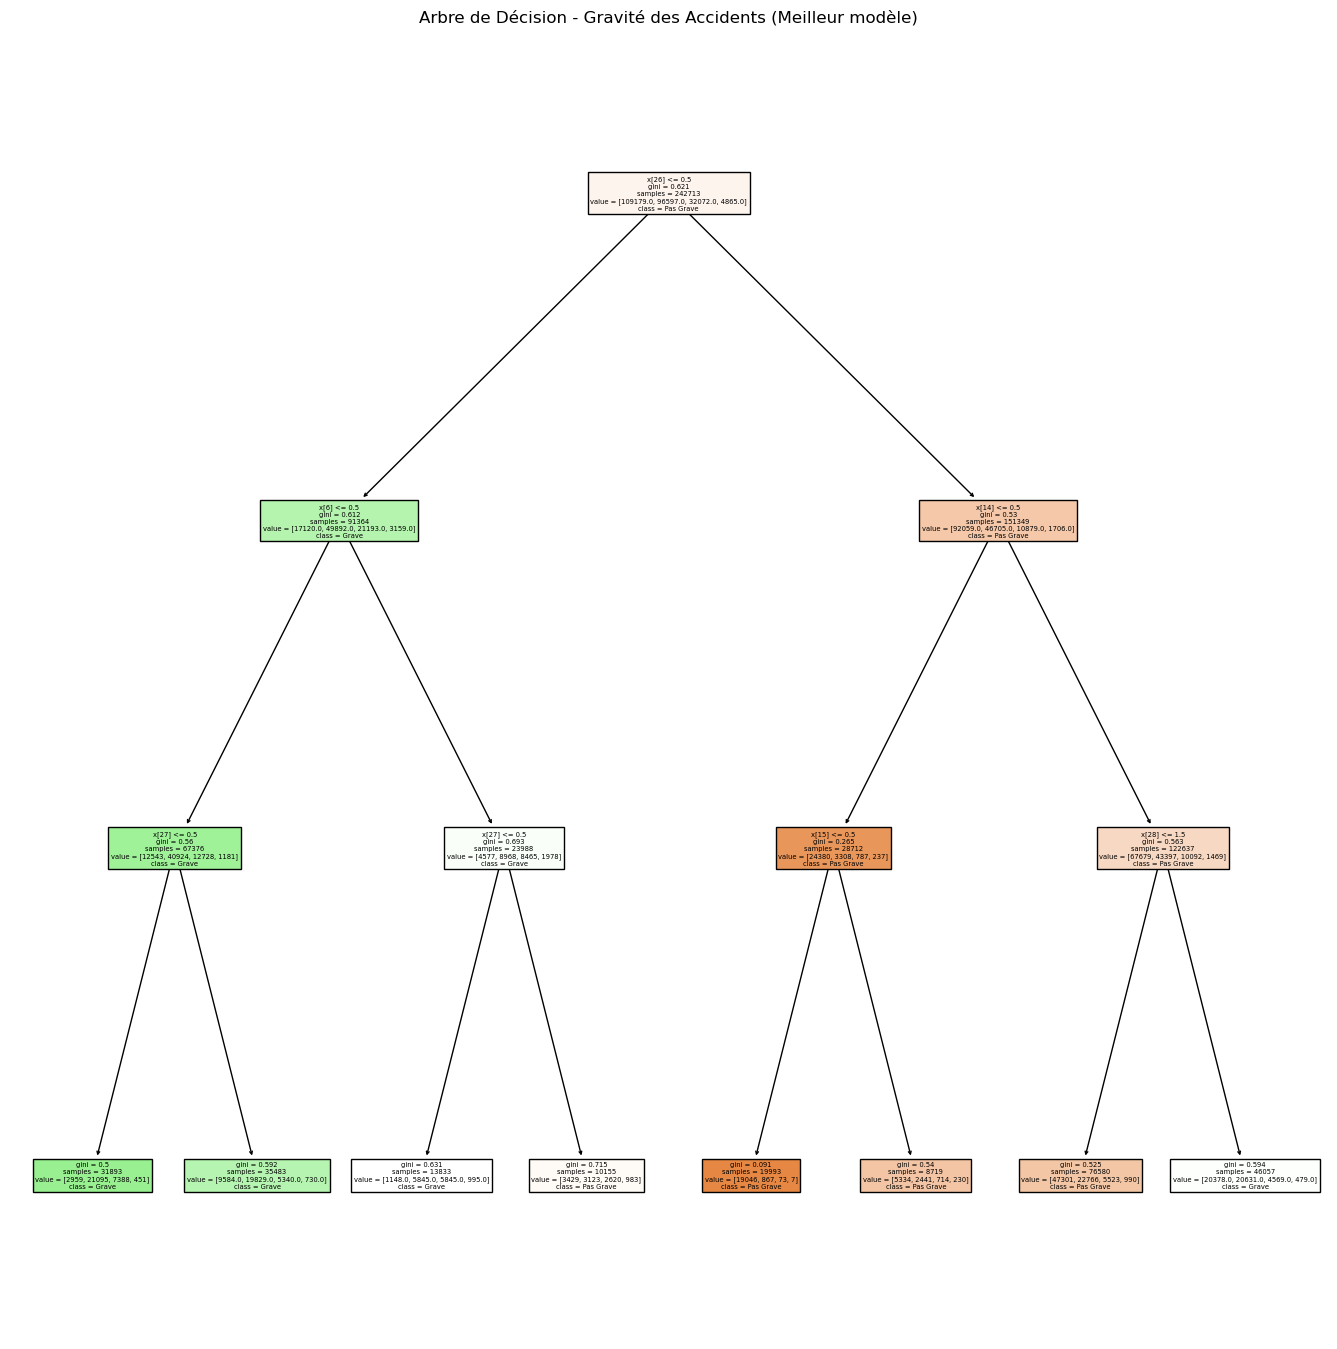

            Importance
Feature 26    0.620585
Feature 14    0.144754
Feature 28    0.065307
Feature 6     0.063563
Feature 27    0.060217
Feature 15    0.045574
Feature 3     0.000000
Feature 17    0.000000
Feature 2     0.000000
Feature 25    0.000000
Feature 24    0.000000
Feature 23    0.000000
Feature 22    0.000000
Feature 21    0.000000
Feature 20    0.000000
Feature 19    0.000000
Feature 18    0.000000
Feature 16    0.000000
Feature 4     0.000000
Feature 1     0.000000
Feature 13    0.000000
Feature 12    0.000000
Feature 11    0.000000
Feature 10    0.000000
Feature 9     0.000000
Feature 8     0.000000
Feature 7     0.000000
Feature 5     0.000000
Feature 0     0.000000


KeyError: 'Feature'

<Figure size 1000x800 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('C:/Users/jean-/OneDrive/Bureau/Brief13/Brief13_clean/df_ml.csv', delimiter=';')

# Filtrer les données
data = data[data['sexe'] >= 0]

# Séparer les caractéristiques et la cible
X = data.drop('grave', axis=1)
y = data['grave']

# Colonnes à encoder
col_a_encoder = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), col_a_encoder)], remainder='passthrough')
X = ct.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle de base
dt = DecisionTreeClassifier()

# Définir la grille d'hyperparamètres
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Effectuer la recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure précision : {grid_search.best_score_}")

# Utiliser le meilleur modèle pour prédire
best_dtree = grid_search.best_estimator_
predictions = best_dtree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy sur les données de test: {accuracy}")

# Réduire la profondeur de l'arbre pour la visualisation (si nécessaire)
best_dtree.set_params(max_depth=3)
best_dtree.fit(X_train, y_train)

# Visualisation de l'arbre de décision
plt.figure(figsize=(17, 17))
plot_tree(best_dtree, filled=True, feature_names=None, class_names=['Pas Grave', 'Grave'])
plt.title("Arbre de Décision - Gravité des Accidents (Meilleur modèle)")
plt.show()

# Obtenir les importances des caractéristiques
importance_features = best_dtree.feature_importances_
important_features_df = pd.DataFrame(importance_features, index=[f'Feature {i}' for i in range(len(importance_features))], columns=['Importance'])
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)
print(important_features_df)


plt.figure(figsize=(10,8))
plt.barh(data['Feature'], df_imp['Importance'], color=['green' if coef > 0 else 'red' for coef in df_imp['Coefficient']])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance et Direction des Poids des Features')
plt.gca().invert_yaxis()
plt.show()

# Explication des résultats
"""
Explication des Résultats:

1. Meilleurs Paramètres:
   Les meilleurs paramètres trouvés lors de la recherche en grille sont affichés. Ils comprennent la profondeur maximale de l'arbre (max_depth), le nombre minimal d'échantillons requis pour diviser un nœud (min_samples_split), le nombre minimal d'échantillons par feuille (min_samples_leaf) et le critère utilisé pour mesurer la qualité de la division (criterion).

2. Précision de Validation Croisée:
   Le score de précision obtenu lors de la validation croisée avec les meilleurs paramètres est indiqué. Cela donne une idée de la performance attendue du modèle sur des données non vues.

3. Précision sur les Données de Test:
   La précision du modèle sur les données de test est affichée. Cela montre la performance réelle du modèle sur des données distinctes de celles utilisées pour l'entraînement.

4. Visualisation de l'Arbre de Décision:
   Un arbre de décision utilisant les meilleurs paramètres est visualisé. Les nœuds de l'arbre montrent les divisions basées sur les caractéristiques, les distributions des classes et la prédiction faite pour chaque feuille.
"""

# Explication de la Pertinence des Critères:
"""
Pertinence des Critères Retenus pour Prédire la Gravité d'un Accident:

1. Profondeur Maximale de l'Arbre (max_depth):
   - **Profondeur Maximale de l'Arbre** : La profondeur de l'arbre limite le nombre de niveaux que l'arbre peut avoir. Une profondeur trop grande peut entraîner un surapprentissage (overfitting), tandis qu'une profondeur trop petite peut entraîner un sous-apprentissage (underfitting). Ainsi, ajuster cette hyperparamètre permet de trouver un bon équilibre pour capturer les informations importantes sans complexité excessive.

2. Nombre Minimal d'Échantillons pour Diviser un Nœud (min_samples_split):
   - **min_samples_split** : Ce critère détermine le nombre minimal d'échantillons requis pour diviser un nœud interne. Une valeur élevée empêche les divisions sur des échantillons trop petits qui pourraient être dus à du bruit, améliorant ainsi la généralisation du modèle.

3. Nombre Minimal d'Échantillons par Feuille (min_samples_leaf):
   - **min_samples_leaf** : Ce critère détermine le nombre minimal d'échantillons qu'une feuille doit contenir. Il aide à contrôler la taille des feuilles terminales de l'arbre. Des feuilles trop petites peuvent indiquer un modèle surajusté, tandis que des feuilles plus grandes aident à lisser les décisions prises par le modèle.

4. Critère pour Mesurer la Qualité de la Division (criterion):
   - **Critère (criterion)** : Les deux critères couramment utilisés sont le "gini" et l'"entropy". Ils mesurent l'homogénéité des nœuds, avec "gini" favorisant des nœuds plus homogènes et "entropy" calculant la quantité d'information ou de désordre. Choisir le bon critère aide à améliorer la qualité des divisions effectuées par l'arbre.

5. Critères Effectivement Retenus:
   Les critères effectivement retenus par l'arbre de décision sont déterminés en analysant les importances des caractéristiques. Chaque caractéristique contribue différemment à la prédiction de la gravité d'un accident. Les caractéristiques avec une importance plus élevée ont un impact plus significatif sur les décisions prises par l'arbre. Les résultats affichés montrent l'importance relative de chaque caractéristique utilisée dans le modèle.
"""
